#Amazon Review Sentiment Analysis

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!pip install kaggle


In [3]:
!kaggle datasets download -d humagonen/amazon-reviews-for-sentiment-analysis-train-clean


Dataset URL: https://www.kaggle.com/datasets/humagonen/amazon-reviews-for-sentiment-analysis-train-clean
License(s): other
 98% 337M/344M [00:02<00:00, 160MB/s]
100% 344M/344M [00:02<00:00, 143MB/s]


In [4]:
!unzip amazon-reviews-for-sentiment-analysis-train-clean.zip


Archive:  amazon-reviews-for-sentiment-analysis-train-clean.zip
  inflating: amazon_reviews_train_clean.csv  


In [19]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [6]:
df = pd.read_csv('amazon_reviews_train_clean.csv')
df.head()

,label,text
0,2,stuning even sound track beautiful paint sener...
1,2,best soundtrack ever anything im reading lot r...
2,2,amazing soundtrack favorite music time hand in...
3,2,excellent soundtrack truly like soundtrack enj...
4,2,remember pull jaw floor hearing if youve playe...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

In [17]:
df['label'].value_counts()

,count
label,
2,1800000
1,1800000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   label   int64 
 1   text    object
dtypes: int64(1), object(1)
memory usage: 54.9+ MB


In [22]:
X = df['text']   # Feature: Text of posts
y = df['label']  # Target: Sentiment labels (0 or 1)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
sia = SentimentIntensityAnalyzer()

In [27]:
def classify_sentiment(text):

    text = str(text)
    # Get polarity scores
    score = sia.polarity_scores(text)
    # If compound score is positive, classify as positive (1), else negative (0)
    return 1 if score['compound'] >= 0 else 0

In [28]:
# Apply the function to the training and testing sets
y_train_pred = X_train.apply(classify_sentiment)
y_test_pred = X_test.apply(classify_sentiment)

In [29]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.25
Testing Accuracy: 0.25


In [30]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

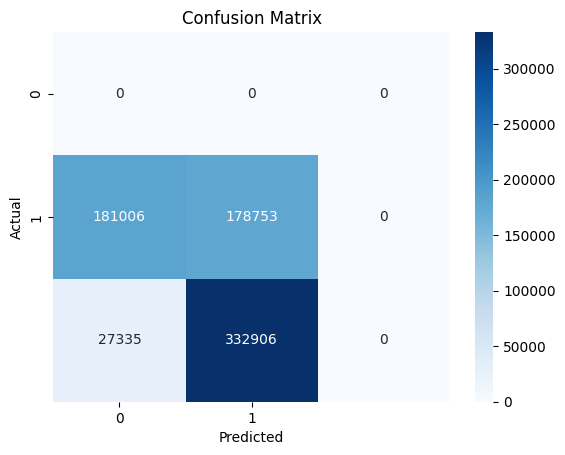

In [31]:
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#The low accuracy,




### The low accuracy observed in the model, despite having a balanced dataset with a 50/50 split of positive and negative labels, can be largely attributed to the limitations of the VADER sentiment analysis tool used for polarity scoring. While VADER is effective for capturing sentiment in text, it relies on a lexicon-based approach that may not fully comprehend the nuances and context of the language used in the posts.

###Even though VADER converts words into positive, negative, and compound scores, it may misinterpret the sentiment of certain phrases or fail to recognize sarcasm, context, or domain-specific language. As a result, the model may classify texts inaccurately, leading to an imbalance in predictions and ultimately impacting accuracy.

###Furthermore, simply applying the VADER scores and thresholds for classification does not account for the complexity of the data or the subtle variations in sentiment expression. This oversimplification can cause the model to struggle with effectively distinguishing between the nuanced sentiments within the balanced dataset. Therefore, relying solely on VADER for sentiment analysis, while convenient, may not capture the full spectrum of sentiments represented in the data, contributing to the observed low accuracy in predictions.

#Below show the compound values for better understanding

In [34]:
# Step 3: Calculate compound polarity score using VADER
df['polarity_scores'] = df['text'].astype(str).apply(lambda x: sia.polarity_scores(x))

In [35]:
# Step 4: Extract compound score and classify sentiment
df['compound'] = df['polarity_scores'].apply(lambda x: x['compound'])


In [36]:

# Define threshold for positive and negative sentiment
df['predicted_sentiment'] = df['compound'].apply(lambda score: 'positive' if score >= 0 else 'negative')

In [40]:
df.head(5)

,label,text,polarity_scores,compound,predicted_sentiment
0,2,stuning even sound track beautiful paint sener...,"{'neg': 0.115, 'neu': 0.53, 'pos': 0.355, 'com...",0.9366,positive
1,2,best soundtrack ever anything im reading lot r...,"{'neg': 0.057, 'neu': 0.7, 'pos': 0.243, 'comp...",0.8807,positive
2,2,amazing soundtrack favorite music time hand in...,"{'neg': 0.077, 'neu': 0.479, 'pos': 0.443, 'co...",0.9889,positive
3,2,excellent soundtrack truly like soundtrack enj...,"{'neg': 0.127, 'neu': 0.459, 'pos': 0.413, 'co...",0.9808,positive
4,2,remember pull jaw floor hearing if youve playe...,"{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'comp...",0.9767,positive


In [37]:
# Step 5: Calculate percentage of positive and negative data
positive_percentage = (df['predicted_sentiment'] == 'positive').mean() * 100
negative_percentage = (df['predicted_sentiment'] == 'negative').mean() * 100

In [42]:
print(f"Percentage of positive data: {positive_percentage:.2f}%")
print(f"Percentage of negative data: {negative_percentage:.2f}%")

Percentage of positive data: 71.05%
Percentage of negative data: 28.95%


In [38]:
# Step 6: Output the dataframe with the compound scores and sentiment classification
print(df[['text', 'compound', 'predicted_sentiment']])

                                                      text  compound  \
0        stuning even sound track beautiful paint sener...    0.9366   
1        best soundtrack ever anything im reading lot r...    0.8807   
2        amazing soundtrack favorite music time hand in...    0.9889   
3        excellent soundtrack truly like soundtrack enj...    0.9808   
4        remember pull jaw floor hearing if youve playe...    0.9767   
...                                                    ...       ...   
3599995  dont high chair look great first come box but ...    0.8896   
3599996  look nice low functionality used highchair kid...   -0.7883   
3599997  compact but hard clean small house really want...    0.9523   
3599998  saying not sure book supposed really rehash ve...   -0.1625   
3599999  make blood run agree every american read book ...    0.9698   

        predicted_sentiment  
0                  positive  
1                  positive  
2                  positive  
3              

In [39]:
# Output the percentages
print(f"Percentage of positive data: {positive_percentage:.2f}%")
print(f"Percentage of negative data: {negative_percentage:.2f}%")

Percentage of positive data: 71.05%
Percentage of negative data: 28.95%
